KNN Scratch Implementation

In [33]:
# Step 2: Download the dataset using its file ID
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

# Step 3: Verify the file is downloaded
!ls


Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 37.4MB/s]
multiclass.csv	sample_data


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter

# Load the dataset
df = pd.read_csv("/content/multiclass.csv")

# Preview the first few rows
print(df.shape)
df.head()


(440, 8)


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


Data Preprocessing

In [35]:
# Check missing values
print(df.isnull().sum())
#no missing values

#Label encoding: No categorical values, only numeric values

#Splitting features and target
X = df.drop("class", axis=1).values  # features
y = df["class"].values              # target

#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Scaling the values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64


Implementation

In [36]:
#Distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        # Just stores the training data
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances to all training points
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get indices of k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Get the labels of those neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [37]:
print(X_train.shape)   # (rows, columns)
print("Number of rows:", X_train.shape[0])
print("Number of columns:", X_train.shape[1])


(352, 7)
Number of rows: 352
Number of columns: 7


Testing with the test set data

In [38]:
# Initialize KNN with chosen k
knn = KNN(k=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Scratch KNN Accuracy:", accuracy)


Scratch KNN Accuracy: 0.9204545454545454


Plotting Accuracy for different K values

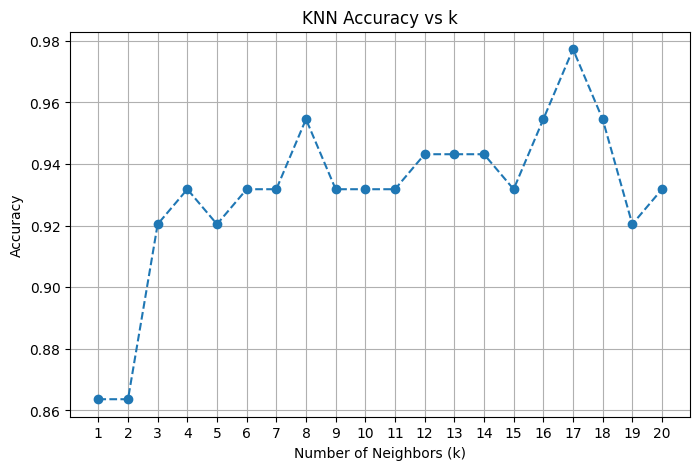

In [39]:
import matplotlib.pyplot as plt

k_values = range(1, 21)   # test k = 1 to 20
accuracies = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    accuracies.append(accuracy)

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='--')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.xticks(k_values)
plt.grid(True)
plt.show()
